In [7]:
from IPython.display import Image

from scipy.special import kolmogorov
import numpy as np
import math
import matplotlib as plt

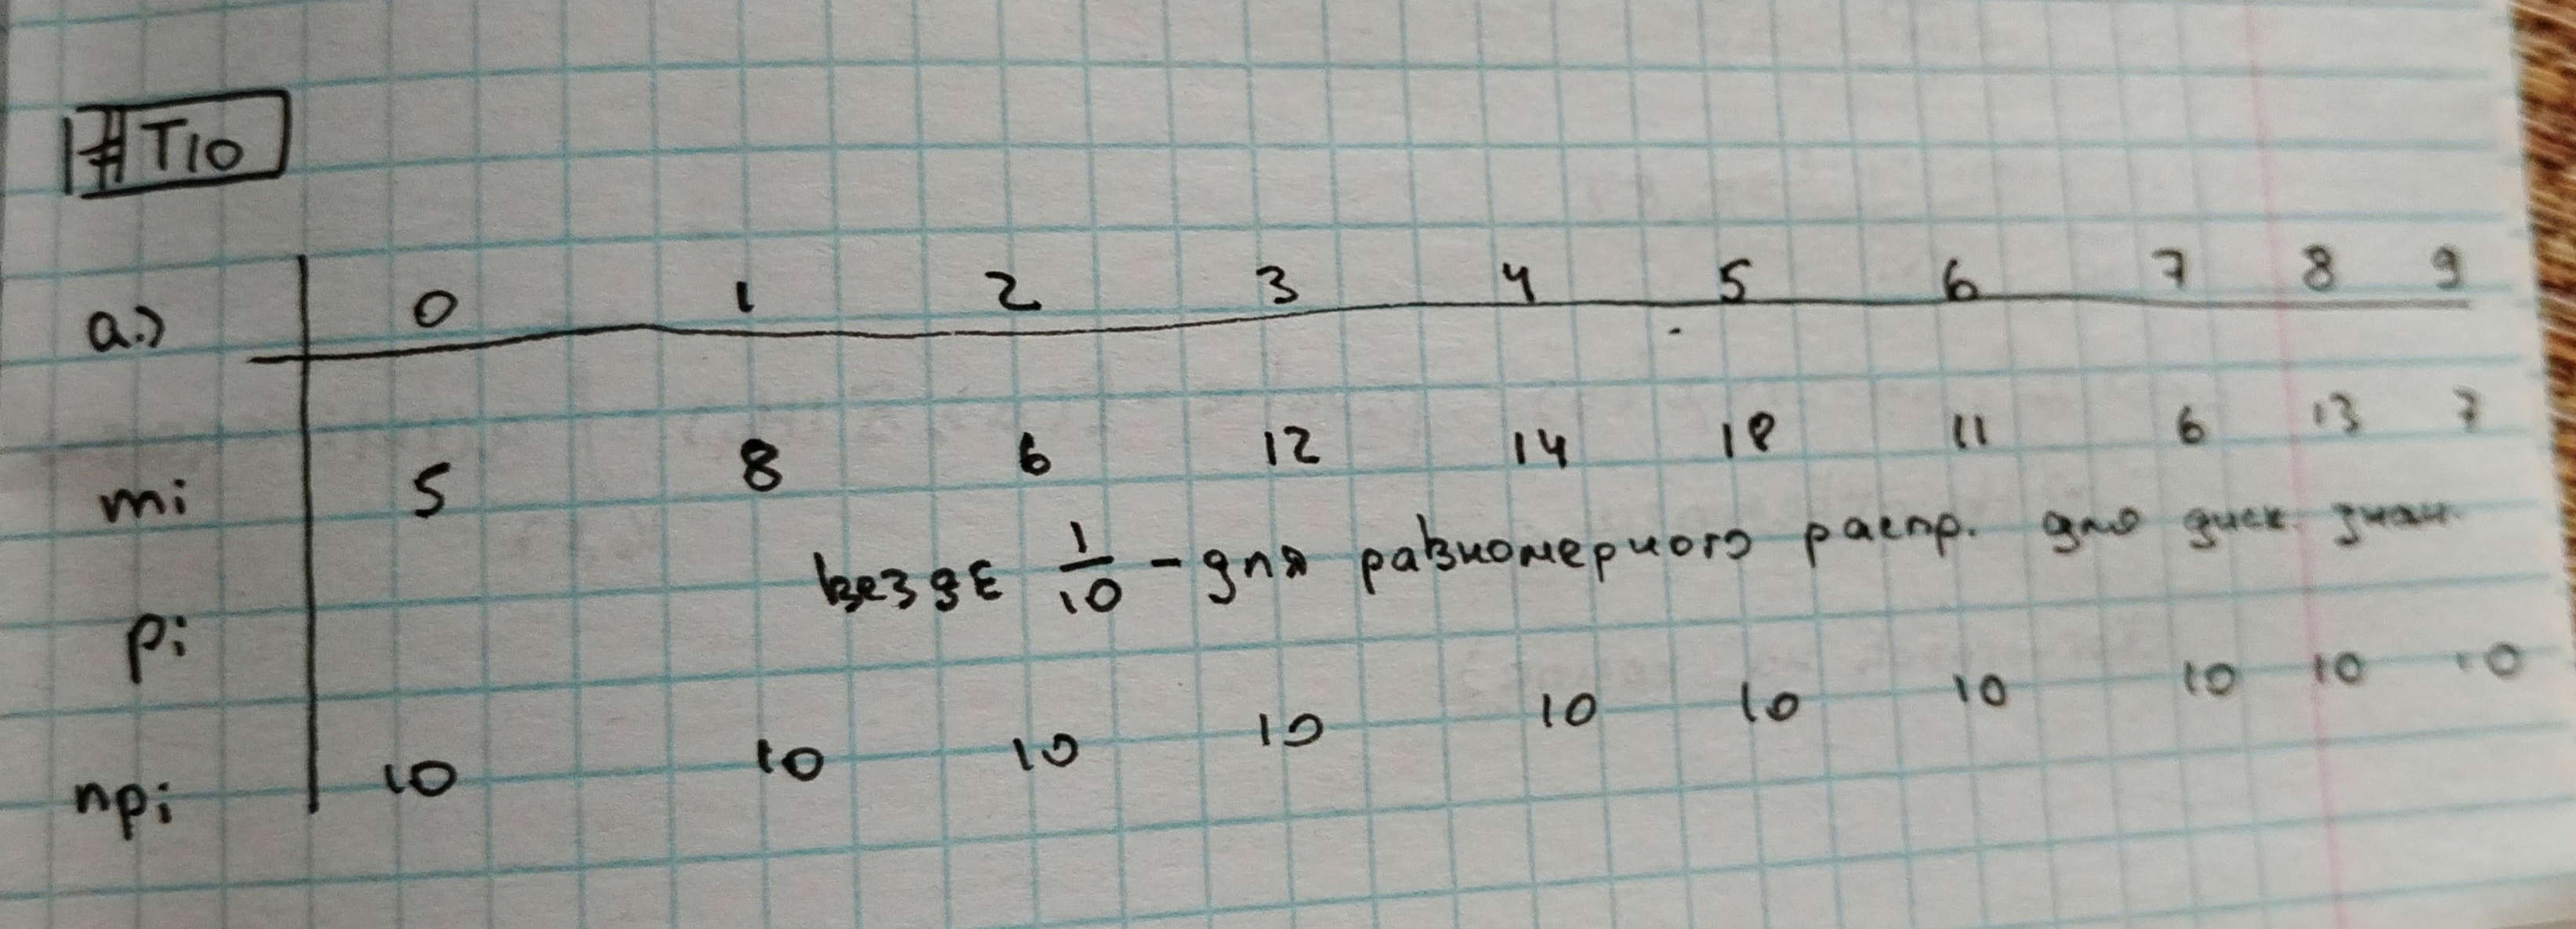

In [ ]:
# Проверка по хи-квадрату
Image("pics/task_10_1.jpg")

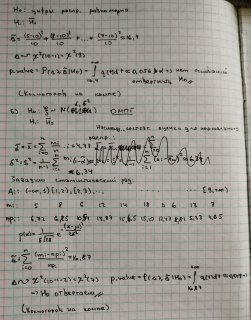

In [3]:
Image("pics/task_10_2.jpg")

In [ ]:
# Проверка по Колмогорову пункта а)

# Размер выборки
N = 100
m = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])

F_emp = np.array([sum(m[:i]) for i in range(len(m) + 1)]) / N
F_th = np.arange(10) / 10

delta = np.sqrt(N) * np.max([max(np.abs(F_th[i] - F_emp[i]),
                                 np.abs(F_th[i] - F_emp[i+1])) for i in range(F_th.size)])

p_value = kolmogorov(delta)

print(f"p-value: {p_value}")
print("Меньше уровня значимости, поэтому H0 отвергается.")

p-value: 0.039681879538114355
Меньше уровня значимости, поэтому H0 отвергается.


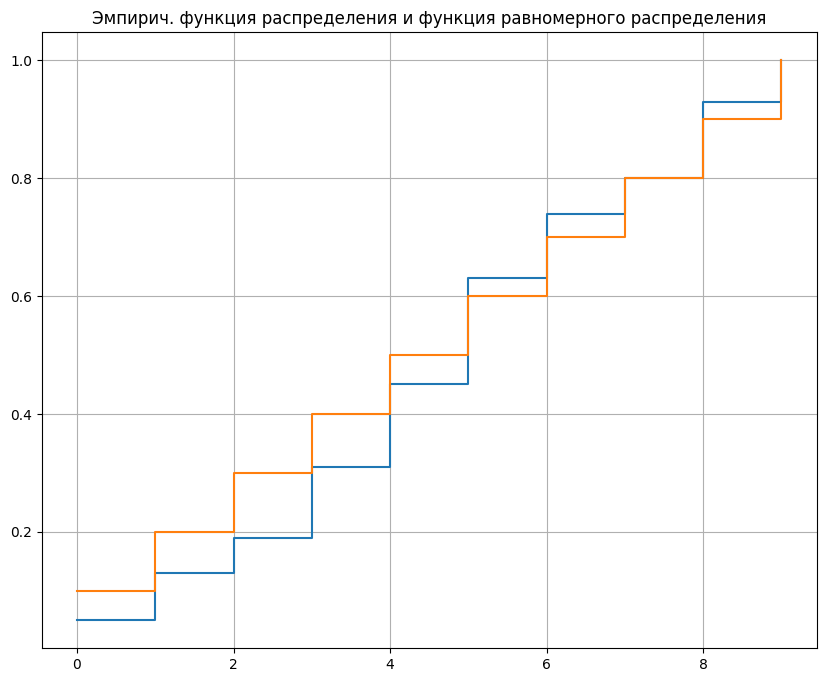

In [25]:
# Картинка
import matplotlib.pyplot as plt

columns = [i for i in range(0, 9 + 1)]
p_even = [i / 10 for i in range(1, 10 + 1)]

plt.step(columns, F_emp[1:], where='post')
plt.step(columns, p_even, where="post")
plt.title('Эмпирич. функция распределения и функция равномерного распределения')
plt.grid(True)
plt.show()

In [28]:
# Проверка по Колмогорову (пункт б)


def gaussian_cdf(val, mu, std_dev):
    """Gaussian cumulative distribution function."""
    return 0.5 * (1 + math.erf((val - mu)/(np.sqrt(2) * std_dev)))


# Количество интераций бутстрапа
n_bootstrap_iterations = 50_000

# Полуинтервалы
intervals = np.array([(-np.inf, 1)] + [(i, i + 1) for i in range(1, 9)] + [(9, np.inf)])
# Изначальные данные
data = np.repeat(np.arange(len(m)), m)

mu_hat = np.mean(data)
std_dev_hat = np.sqrt(np.var(data) * N/(N-1))

def empirical_gaussian_cdf(val): 
    return gaussian_cdf(val, mu_hat, std_dev_hat)

bootstrap_statistics = []

values = np.arange(10)
test_statistic = np.sqrt(N) * np.max([max(np.abs(empirical_gaussian_cdf(values[i]) - F_emp[i]),
                                      np.abs(empirical_gaussian_cdf(values[i]) - F_emp[i + 1])) for i in range(10)])

for _ in range(n_bootstrap_iterations):
    bootstrap_sample = np.array(sorted(np.random.normal(mu_hat, std_dev_hat, N)))
    mu_bootstrap = bootstrap_sample.mean()
    std_dev_bootstrap = np.sqrt(bootstrap_sample.var() * N/(N - 1))

    F_bootstrap_empirical = [i / N for i in range(N + 1)]

    def bootstrap_gaussian_cdf(j):
      return gaussian_cdf(bootstrap_sample[j], mu_bootstrap, std_dev_bootstrap)

    sup_bootstrap = np.sqrt(N) * np.max([max(np.abs(bootstrap_gaussian_cdf(j) - F_bootstrap_empirical[j]), \
                                     np.abs(bootstrap_gaussian_cdf(j) - F_bootstrap_empirical[j+1])) \
                                        for j in range(len(bootstrap_sample))])

    bootstrap_statistics.append(sup_bootstrap)

bootstrap_statistics = np.array(bootstrap_statistics)

p_val = len(bootstrap_statistics[bootstrap_statistics >= test_statistic]) / n_bootstrap_iterations

print(f"p-value: {p_val}")
print("Меньше уровня значимости, поэтому H0 отвергается.")

p-value: 0.01464
Меньше уровня значимости, поэтому H0 отвергается.
